# SINGING VOICE TRANSCRIPTION USING DNN
Rigaud, 2016 - Reproduction of implementation and results comparision

## Data pre-processing


Data from MedleyDB - [Select vocal musics from MusicDelta_Reggae to Wolf_DieBekherte]

Each audio signal are converted to mono and resampled to 16kHz. (For what?)

Then, pre-decomposed applying a double-stage HPSS (in the article are described the reason [2.2])

First, input signal $s$ is decomposed into $h_1$ e $p_1$ using high-frequency resolution (window of 300 ms)

Second, $p_1$ is further decomposed into $h_2$ e $p_2$ using a low-frequency resolution (window of 30 ms)

In [2]:
# Import libraries and modules 
from librosa import *
import librosa.display
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [3]:
y, sr = librosa.load(librosa.util.example_audio_file(), mono=True) # Converted to mono
print (y.shape)

y_16k = librosa.resample(y, sr, 16000)

print (y_16k.shape)  # Re-sampled to 16kHz

(1355168,)
(983342,)


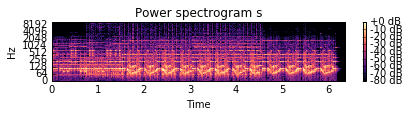

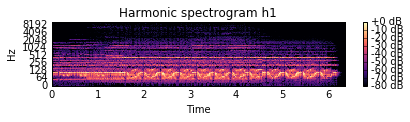

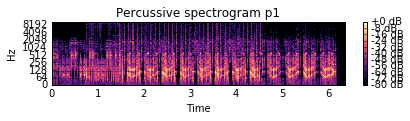

In [4]:
#D = librosa.stft(y_mono) # Hamming window 64ms 1024 samples com overlap 0,75 freq between 50Hz - 4000Hz
s = librosa.stft(y_16k, n_fft=4800, hop_length=int(4800*3/4), window=scipy.signal.hamming(4800))
h1, p1 = librosa.decompose.hpss(s)

plt.figure()
ax1 = plt.subplot(3,1,1)
librosa.display.specshow(librosa.amplitude_to_db(s, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram s')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

ax2 = plt.subplot(3,1,2, sharex=ax1)
librosa.display.specshow(librosa.amplitude_to_db(h1, ref=np.max), y_axis='log', x_axis='time')
plt.title('Harmonic spectrogram h1')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

ax2 = plt.subplot(3,1,3, sharex=ax1)
librosa.display.specshow(librosa.amplitude_to_db(p1, ref=np.max), y_axis='log', x_axis='time')
plt.title('Percussive spectrogram p1')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

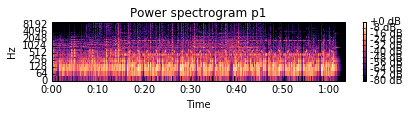

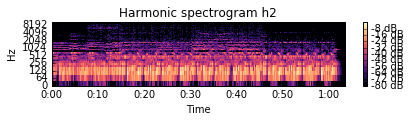

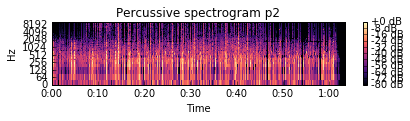

In [5]:
p1 = librosa.stft(y_16k, n_fft=480, hop_length=int(480*3/4), window=scipy.signal.hamming(480))
h2, p2 = librosa.decompose.hpss(p1)

plt.figure()
ax1 = plt.subplot(3,1,1)
librosa.display.specshow(librosa.amplitude_to_db(p1, ref=np.max), y_axis='log', x_axis='time')
plt.title('Power spectrogram p1')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

ax2 = plt.subplot(3,1,2, sharex=ax1)
librosa.display.specshow(librosa.amplitude_to_db(h2, ref=np.max), y_axis='log', x_axis='time')
plt.title('Harmonic spectrogram h2')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

ax2 = plt.subplot(3,1,3, sharex=ax1)
librosa.display.specshow(librosa.amplitude_to_db(p2, ref=np.max), y_axis='log', x_axis='time')
plt.title('Percussive spectrogram p2')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

(513, 1281)


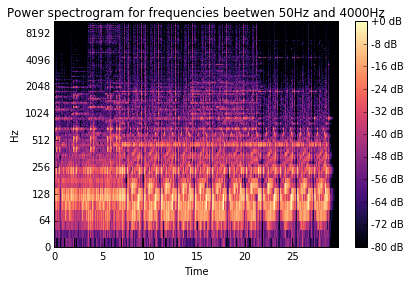

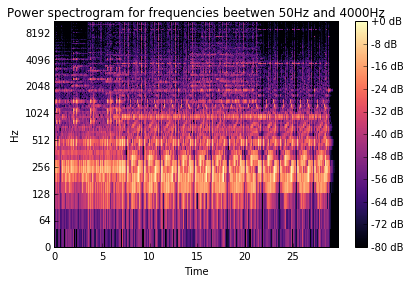

In [38]:
## Input for F0-Estimation DNN

# Discarting frequencies 
s = librosa.stft(y_16k, n_fft=1024, hop_length=int(1024*3/4), window=scipy.signal.hamming(1024))
s_log = librosa.amplitude_to_db(s, ref=np.max)
print(s_log.shape)

librosa.display.specshow(s_log, y_axis='log', x_axis='time')
plt.title('Power spectrogram for frequencies beetwen 50Hz and 4000Hz')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

librosa.display.specshow(s_log[:250,::], y_axis='log', x_axis='time') # verify these values of cut
plt.title('Power spectrogram for frequencies beetwen 50Hz and 4000Hz')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

## Falta rescalar o spectrograma entre 0 e 1

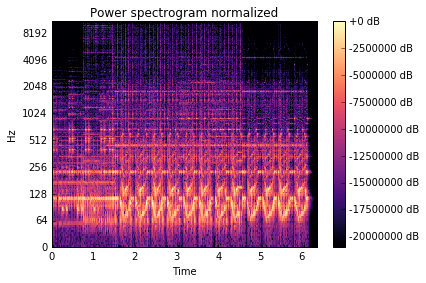

1.0


In [20]:
s_log = librosa.amplitude_to_db(s, ref=np.max)
s_max = s_log.max()

librosa.display.specshow((s_log/s_max), y_axis='log', x_axis='time', fmin=50, fmax=4000)
plt.title('Power spectrogram normalized')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()

print ((s_log/s_max).max())

## Associate labels for each frame

Get each frame from annotation and associate to a label [1-193]

Get each frame from spectrograms and put it on a vector

Write a .csv file with delimiter ","

### The input for the VAD was:

### The input for the F0-Estimator was: